# Watershel Algorithm - Part 2 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

## Loading and Displaying the Image

In [3]:
img = cv2.imread('../DATA/pennies.jpg')

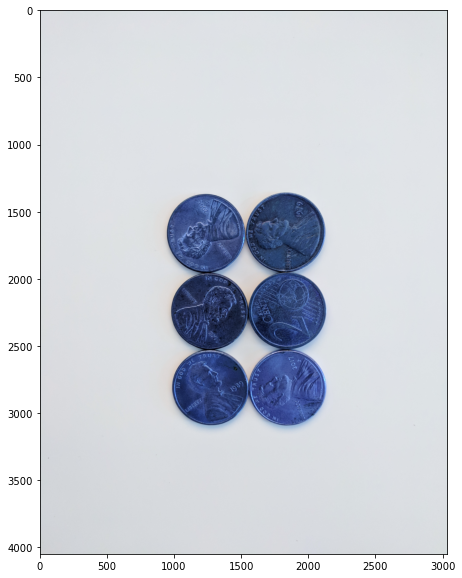

In [4]:
display(img)

## Segment Coins Using Watershed Algorithm

### 1. Median Blur

In [5]:
org = img.copy()

img = cv2.medianBlur(img, 35)

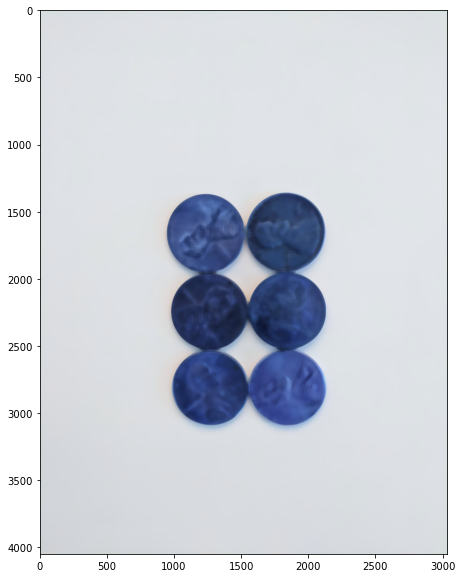

In [6]:
display(img)

### 2. Gray Scale

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

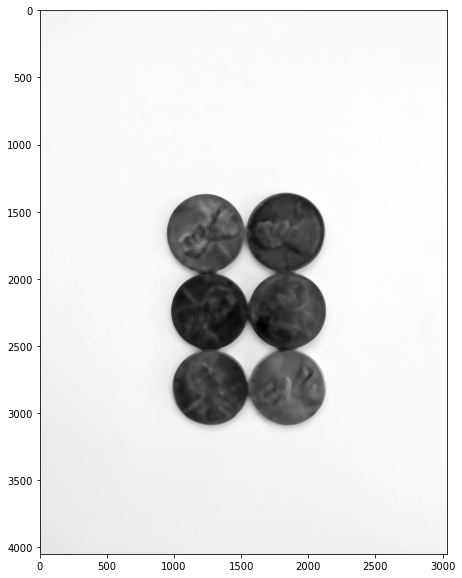

In [8]:
display(gray)

### 3. Binary Threshold

In [9]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

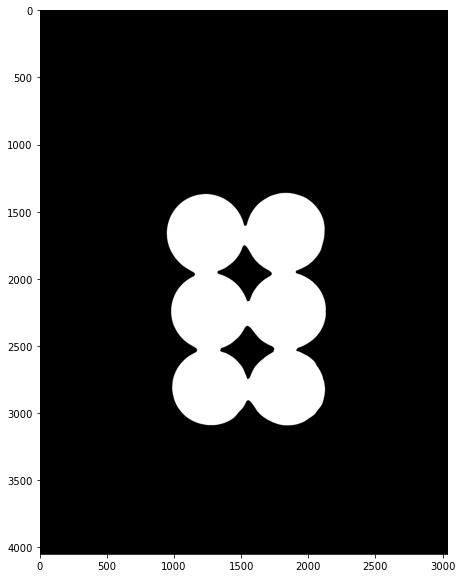

In [10]:
display(thresh)

### 4. Noise Removal (Optional)

In [11]:
kernel = np.ones((3, 3), np.uint8)

In [12]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [13]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

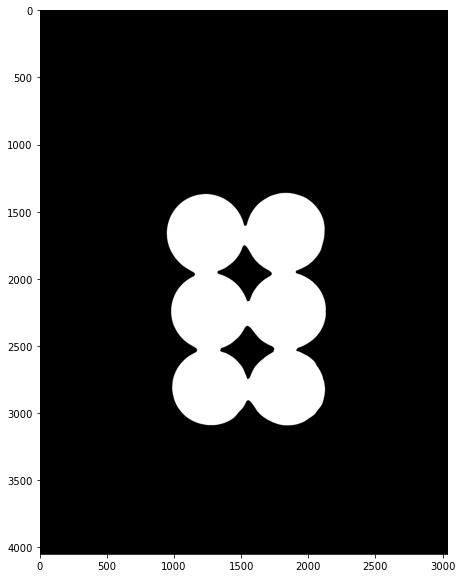

In [14]:
display(opening)

### 5. Finding the Background That We Are Sure of

In [15]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

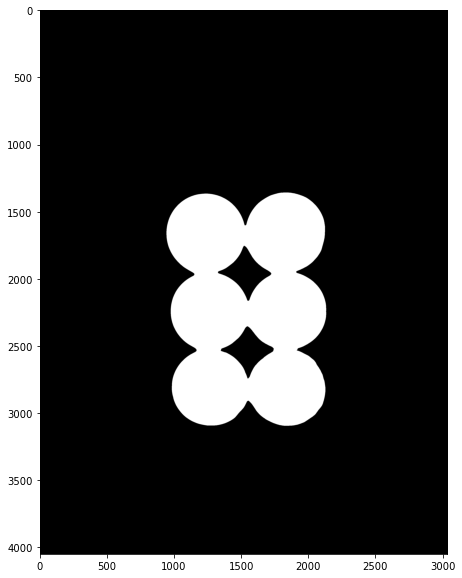

In [16]:
display(sure_bg)

### 6. Distance Transform

In [17]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

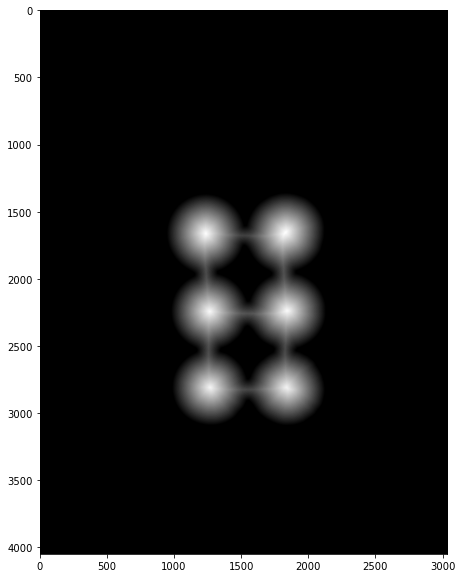

In [18]:
display(dist_transform)

### 7. Thresholding

In [19]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

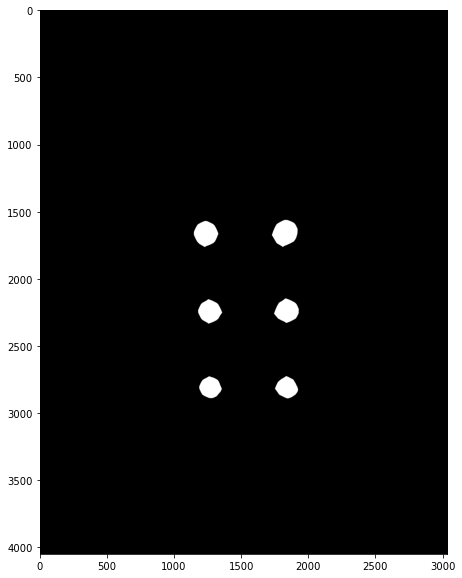

In [20]:
display(sure_fg)

### 8. Find Unknown Region

In [21]:
sure_fg = np.uint8(sure_fg)

In [22]:
unkown = cv2.subtract(sure_bg, sure_fg)

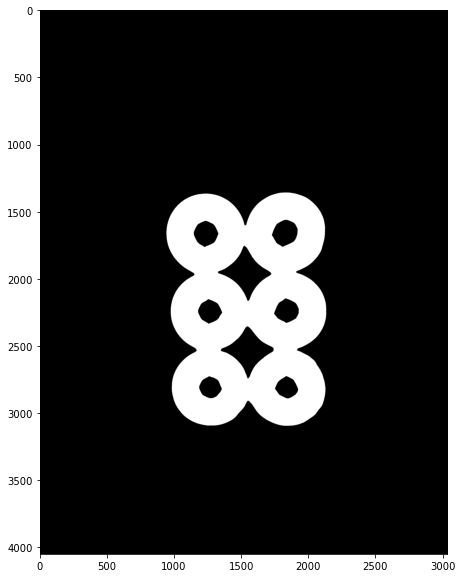

In [23]:
display(unkown)

### 9. Label Markers of Sure Foreground

In [24]:
ret, markers = cv2.connectedComponents(sure_fg)

In [25]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [26]:
markers = markers + 1

In [27]:
markers[unkown == 255] = 0

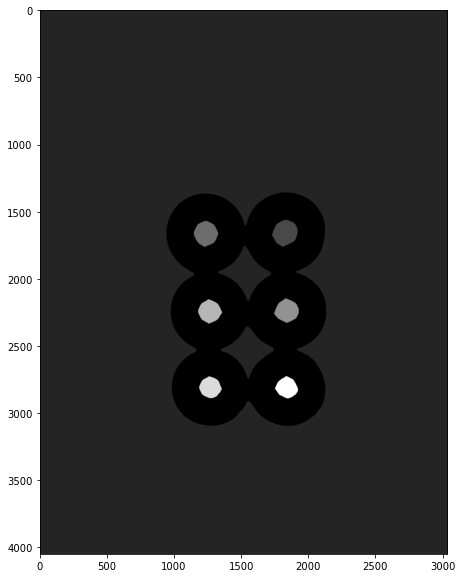

In [28]:
display(markers)

### 10. Apply Watershed Algorithm to find Markers

In [29]:
markers = cv2.watershed(img, markers)

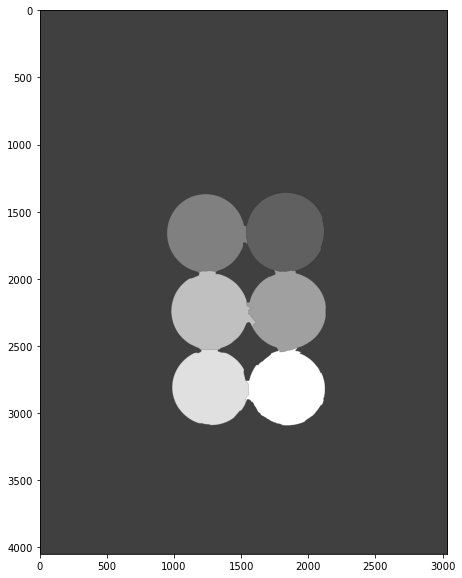

In [30]:
display(markers)

### 11. Find Contours

In [31]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(org, contours, i, (255, 0, 0), 10)

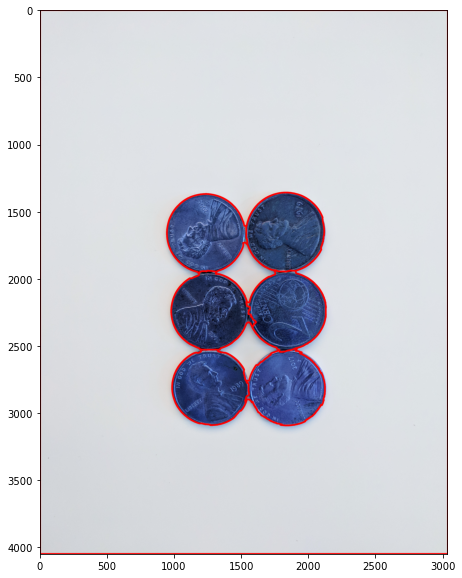

In [32]:
display(org)